# Enoncé
## Contexte
**Mon rôle** : Data Scientist dans une start-up de la EdTech, nommée academy

**Commanditaire** : Mark, mon manager

**Activité de l'entreprise :** propose des contenus de formation en ligne pour un public de niveau lycée et université

**Projet :** projet d’expansion à l’international de l’entreprise

**Type de Mission :** analyse exploratoire

## Attendus
**But de la mission :** déterminer si les données sur l’éducation de la banque mondiale peut informer les décisions d'ouverture vers de nouveaux pays

**Détails de la mission :**
- Quels sont les pays avec un fort potentiel de clients pour nos services ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?

Les données de la Banque mondiale sont disponibles à l’adresse suivante : https://datacatalog.worldbank.org/dataset/education-statistics. L’organisme “EdStats All Indicator Query” de la Banque mondiale répertorie 4000 indicateurs internationaux décrivant l’accès à l’éducation, l’obtention de diplômes et des informations relatives aux professeurs, aux dépenses liées à l’éducation...
Plus d'info sur ce site : http://datatopics.worldbank.org/education/.

**Etapes demandées :**
- Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
- Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

# Importations
## Importation des librairies et configuration du notebook

In [5]:
pip show pandas
# last version : 1.3.4

Name: pandas
Version: 1.2.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: c:\users\bland\anaconda3\lib\site-packages
Requires: numpy, pytz, python-dateutil
Required-by: statsmodels, seaborn
Note: you may need to restart the kernel to use updated packages.


In [9]:
!pip install pandas --upgrade --user

In [10]:
pip show pandas

Name: pandas
Version: 1.3.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: c:\users\bland\anaconda3\lib\site-packages
Requires: numpy, pytz, python-dateutil
Required-by: statsmodels, seaborn
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Format des résultats affichés
pd.set_option('display.max_columns', None) # display.max_columns : contrôle le nombre de colonnes à imprimer (int ou None pour imprimer toutes les colonnes)
pd.set_option('max_colwidth', None) # Vous pouvez augmenter la largeur en passant un int (ou mettre au max en passant None)
pd.set_option("max_rows", None) # Pour modifier le nombre de lignes, vous devez modifier l' option max_rows 

# Pour afficher les graphiques dans la continuité du code, et non pas dans une fenêtre à part:
%matplotlib inline

## Importation des fichiers

In [2]:
df_country = pd.read_csv("./EdStatsCountry.csv", sep = ",")
df_countrySeries = pd.read_csv("./EdStatsCountry-Series.csv", sep = ",")
df_data = pd.read_csv("./EdStatsData.csv", sep = ",")
df_footNote = pd.read_csv("./EdStatsFootNote.csv", sep = ",")
df_series = pd.read_csv("./EdStatsSeries.csv", sep = ",")

### Vérification du fichiers df_country
Je vais commencer par regarder l'aspect général du fichier sur les 5 premières lignes.

In [3]:
df_country.head(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data, national accounts data were revised for 2000 onward; the base year changed to 2002.",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accounts methodology.,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are rescaled.,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09","Living Standards Measurement Study Survey (LSMS), 2012",Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accounts methodology.,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from administrative registers.,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


On peut voir des noms de pays, des régions, d'autres informations tel que les monnaies, ... La données Country Code fait pensé qu'il s'agit d'un fichier de pays. Peut-être que cette colonne de code servira de jointure avec un autre fichier. Je peux aussi voir la colonne *Region* qui sera utile pour faire des statistiques des pays par région.
Je vais regarder maintement la taille du fichier.

In [4]:
df_country.shape

(241, 32)

La première chose que l'on peut observer est que l'on a une base de 241 lignes, surement le nombre de pays de notre base, et de 32 colonnes, surement les informations de tout ces pays. 

In [5]:
df_country['Short Name'].nunique()

241

Oui il y a bien 241 pays dans cette pays. Il s'agit donc d'un fichier où les individus sont les pays et les variables sont les informations qualifiant ces pays. Mais je vais tout de même vérifier qu'il n'y ait pas de doublons. 

In [6]:
df_country.duplicated("Country Code").sum()

0

Il n'y a bien aucun pays en double.

Je vais vérifier qu'il n'y ait pas de problème de type et une trop grosse partie de valeurs manquantes. 

In [7]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

La plupart des séries sont bien de type object (=string). Il y a juste un problème avec les colonnes définies en float, alors que ce sont des colonnes contenant des années. Si jamais je dois les utiliser par la suite, je penserais à les nettoyer dans la partie qui suit. 

Je vois tous à la fin une colonne non nommé et complètement vide : surement une erreur dans la création du fichier (virgule en trop à la fin de la 1ère ligne). Je vais la supprimer tout de suite.

In [8]:
df_country = df_country.drop(columns = "Unnamed: 31")

De plus, la colonne *Region*, qui est indispensable pour effectuer des statistiques à un autre niveau que par pays, contient des valeurs manquantes. Je vais regarder de quel pays il s'agit.

In [9]:
df_country.loc[df_country['Region'].isna(),'Table Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (all income levels)', 'Europe & Central Asia',
       'Europe & Central Asia (all income levels)', 'Euro area',
       'European Union', 'Gibraltar', 'High income',
       'Heavily indebted poor countries (HIPC)',
       'Latin America & Caribbean',
       'Latin America & Caribbean (all income levels)',
       'Least developed countries: UN classification', 'Low income',
       'Lower middle income', 'Low & middle income',
       'Middle East & North Africa (all income levels)', 'Middle income',
       'Middle East & North Africa', 'North America', 'Nauru',
       'OECD members', 'South Asia', 'Sub-Saharan Africa',
       'Sub-Saharan Africa (all income levels)', 'Upper middle income',
       'World'], dtype=object)

A première vue, les "pays", pour lesquels la région n'est pas renseignée, sont en réalité des groupes géographiques. C'est un mélange de région (à vérifier avec les modalités de la série *Region*) et de groupes géographiques basés sur les revenus. 

Je vais vérifier si certaines de ses valeurs sont identiques aux modalités de la colonne *Region*.

In [10]:
df_country['Region'].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

Oui, ses régions font bien parties des "pays" pour lesquelles aucune région n'est renseignée. La table Country ne contient donc pas uniquement des pays, mais aussi des régions du monde et des groupes géographiques basés sur le revenu. 

Il faudra vérifier dans la partie df_data si ce dataframe contient aussi des lignes avec pour pays ces régions.

Je vais regarder combien il y a, réellement, de pays.

In [11]:
df_country.loc[~df_country['Region'].isna(),'Country Code'].nunique()

214

Il y a donc en réalité 214 pays dans ce fichier.

Je vais stocker les codes country des pays, les codes country des régions et les codes country des autres groupes géographiques pour faciliter le traitement des données par la suite.

In [12]:
codePays = df_country.loc[~df_country['Region'].isna(),'Country Code'].unique()
listeRegion = df_country['Region'].unique()
codeGroupeGeo = df_country.loc[(df_country['Region'].isna())&(~df_country['Table Name'].isin(listeRegion)),'Country Code'].unique()

Suite à l'aperçu rapide de ce premier fichier, je sais maintenant qu'il s'agit d'un fichier décrivant les pays de notre base. Pour l'instant, je ne vois que la région à laquelle le pays appartient qui pourrait m'être utile pour l'analyse. 

Je passe au fichier suivant.

### Vérification du fichier df_countrySeries
Je vais là aussi commencer à regarder l'aspect général des 5 premières lignes du fichier.

In [13]:
df_countrySeries.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN


Il y a dans ce fichier des codes de pays, surement les mêmes que pour le premier fichier : s'il y a besoin d'une jointure entre les deux fichier par la suite, je pourrais peut-être me baser sur cette colonne. Il y a aussi une autre colonne code : surement un lien vers un autre fichier. De plus, on peut voir des doublons dans chacune des 2 colonnes de code ; l'identifiant de ce fichier est donc surement l'ensemble de colonnes *CountryCode* et *SeriesCode*. Enfin, la dernière colonne *Description* laisse apparaitre que ce fichier ne sera utile que si l'on veut avoir plus d'informations sur des sources de données. 

Je passe à la taille du fichier. 

In [14]:
df_countrySeries.shape

(613, 4)

Ce fichier est composé de 613 lignes et 4 colonnes.

Je regarde s'il y a le même nombre de pays que pour le fichier df_country.

In [15]:
df_countrySeries['CountryCode'].nunique()

211

Il n'y a que 211 pays, contrairement au 214 pays du premier fichier. On ne connait donc pas les sources de données de 3 pays.

Je regarde le nombre de valeur pour la colonne Series.

In [16]:
df_countrySeries['SeriesCode'].nunique()

21

Il n'y a les informations que pour 21 'series'.

Je vérifie s'il y a des lignes en doublons. 

In [17]:
df_countrySeries.duplicated(['CountryCode','SeriesCode']).sum()

0

Tout va bien, aucune ligne en double détectée. 

Je vais là aussi vérifier le type des colonnes et les valeurs manquantes.

In [18]:
df_countrySeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


Encore mieux, aucune valeur manquante pour ce fichier. En revanche, il y a là aussi une colonne vide en trop que je vais supprimer.

In [19]:
df_countrySeries = df_countrySeries.drop(columns = "Unnamed: 3")

Je ne sais pas encore vraiment ce que contient la colonne *DESCRIPTION* et donc l'utilité de ce fichier. Je vais afficher ses modalités pour voir si cela peut m'aiguiller.

In [20]:
df_countrySeries['DESCRIPTION'].sort_values().unique()

array(['Based on official exchange rates.',
       'Covers mainland Tanzania only.',
       'Data are for areas under the effective control of the Government of the Republic of Cyprus.',
       'Data sources : Australian Bureau of Statistics',
       'Data sources : Bermuda Government Department of Statistics',
       'Data sources : Census and Statistics Department',
       'Data sources : Central Bureau of Statistics',
       'Data sources : Croatian Bureau of Statistics, Council of Europe',
       'Data sources : Department of Statistics Singapore',
       'Data sources : Eurostat',
       'Data sources : Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources : Eurostat, United Nations World Population Prospects. Including the French overseas departments of French Guiana, Guadeloupe, Martinique, Mayotte, and Réunion.',
       'Data sources : For 1960-1989, United Nations World Population Prospects. For 1990 onwards, 1990, 1995, 2000, 

Comme on peut le voir, ce fichier ne sera utile que s'il y a besoin, dans l'analyse, de comparer ou de vérifier la source des données des pays.

Je passe au fichier suivant : l'apparition de data dans le nom du fichier laisse supposer qu'il y aura là plus de données utiles.

### Vérification du fichier df_data
Même principe, Je regarde l'aspect général des 5 premières lignes.

In [21]:
df_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Je peux voir plusieurs choses ici :
- On peut aussi remarquer la colonne contenant les indicateurs, essentiel à notre analyse. 
- Il y a à nouveau les Codes de pays.
- La colonne *Indicator Code* ressemble d'ailleurs à la colonne *SeriesCode* du fichier précédent. Les 'Series' sont donc des indicateurs. Le fichier précédent contient donc la source des résultats des indicateurs. 

Pas conséquent, ce fichier peut-être relié au fichier df_countrySeries par la double clé *Country Code*, *Indicator Code* et au fichier df_country par la clé *Country Code*.

Aspect très particulier de ce fichier : ce ne sont pas les valeurs des indicateurs qui qualifient les pays (puisque les indicateurs sont mis ici en ligne et non en colonne), mais plus l'évolution des résultats au fil des ans. En effet, les indicateurs sont renseignés par année de 1970 à 2100. Bien qu'elles ne soit pas toutes renseignés pour les indicateurs, il faudra par la suite s'interroger sur les années à garder ou non : est-ce que l'analyse sera basée sur une plage temporelle de résultat aussi importante (données trop ancienne ou données par encore d'actualité) ? De plus, il faudra aussi s'interroger sur les pays et les indicateurs à garder ou non : les indicateurs sont-ils suffisament renseigné pour assez de pays ? ; les pays ont-ils assez d'indicateurs pour les qualifier ? 

Enfin, dès les 3 premières lignes du df, on remarque que les pays peuvent n'avoir aucun résultat sur toutes les colonnes années pour certains indicateurs. Il faudra donc dans la partie **Nettoyage des données** les supprimer.  

Regardons maintenant la taille du fichier.

In [22]:
df_data.shape

(886930, 70)

Ce fichier est très gros : 886 930 lignes pour 70 colonnes. On peut penser que même après un nettoyage et filtrage du fichier nous aurons encore une bonne base sur laquelle s'appuyer pour l'analyse.

En parlant de taille : y-a-t-il plus d'indicateurs que dans le fichier countrySeries ?

In [23]:
df_data['Indicator Code'].nunique()

3665

3 665 indicateurs cela correspond à beaucoup plus d'indicateurs que pour le fichier précédent (21 indicateurs).

Comme vu dans la vérification du *df_country*, je vais regarder si ces indicateurs ne décrivent que des pays ou aussi des régions comme pour le fichier country.

In [24]:
df_data.loc[(df_data['Country Name'].isin(df_country['Region'].unique().tolist())) # est-ce des régions ?
            |
            (df_data['Country Name'].isin(df_country.loc[df_country['Region'].isna(),'Table Name'].unique().tolist())) # est-ce des groupes géographiques ?
            ,'Country Name'].unique()

array(['Arab World', 'East Asia & Pacific', 'Euro area',
       'Europe & Central Asia', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa', 'Middle income', 'North America',
       'OECD members', 'South Asia', 'Sub-Saharan Africa',
       'Upper middle income', 'World', 'Gibraltar', 'Nauru'], dtype=object)

Oui, le fichier data ne contient pas que des pays, mais aussi des régions et groupes géographiques.

Je vais regarder combien de lignes et d'indicateurs cela concerne et combien de pays réel il y a.

In [25]:
print("Nb pays :",df_data.loc[(df_data['Country Code'].isin(df_country.loc[~df_country['Region'].isna(),'Country Code'])),'Country Name'].nunique())
print("Nb indicateur concerné :",len(df_data.loc[(df_data['Country Name'].isin(df_country['Region'].unique().tolist()))|(df_data['Country Name'].isin(df_country.loc[df_country['Region'].isna(),'Table Name'].unique().tolist())),'Indicator Name'].unique()))
print("Nb lignes concernées :",df_data.loc[(df_data['Country Name'].isin(df_country['Region'].unique().tolist()))|(df_data['Country Name'].isin(df_country.loc[df_country['Region'].isna(),'Table Name'].unique().tolist())),:].shape[0])

Nb pays : 214
Nb indicateur concerné : 3665
Nb lignes concernées : 80630


Oui, il y a là 3 753 lignes qui sont en vérité des régions ou des groupes basés sur le revenu. 

Il y a en réalité dans le fichier 214 pays.

Il faudra que je réfléchisse à la meilleure manière de gérer ce cas là et que dans la partie nettoyage je nettoie ces 2 fichiers. En effet, je ne peux pas laisser dans *df_data* des lignes de pays et des lignes de régions/groupes géographiques, car il ne s'agit pas du même niveau de données. Ce serait comme analyser des choux et des pommes, ce n'est pas la même chose. 

Et pour les lignes en double ?

In [26]:
df_data.duplicated(['Country Code', 'Indicator Code']).sum()

0

Aucune données en double.

Et pour le type des données et les valeurs manquantes ?

In [27]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

Il y a beaucoup de valeurs manquantes pour les années ici. Y-a-t-il des pays ou les résultats des indicateurs ne sont pas renseignés ?

In [28]:
df_data[df_data.loc[:,"1970":"2100"].isna().all(1)].index.shape

(529525,)

Plus de la motié du fichier ne comporte aucun résultat (sur aucune année) pour l'indicateur et le pays. Il faudrait donc supprimer ces lignes du fichier.

Grâce à ces vérifications, j'ai donc pu voir qu'il s'agissait là du fichier centrale de mon analyse. J'ai aussi vu que je devais y appliquer certains nettoyage (suppression de colonnes, de lignes, ...).

Je vais passer au fichier suivant.

### Vérification du fichier df_footNote
Même principe, j'affiche les 5 premières lignes.

In [29]:
df_footNote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


Il y a de nouveau les clé de jointure *Country Code* et *Series Code* qui peuvent être utile. Il y a aussi des années et une description. 

Ne sachant pas trop à quoi cela va servir, je regarde leur modalité.

In [30]:
print("Modalités de Year : ")
print(df_footNote['Year'].sort_values().unique())
print('---------------------------')
print("Modalités de Description : ")
print(df_footNote['DESCRIPTION'].sort_values().unique())

Modalités de Year : 
['YR1970' 'YR1971' 'YR1972' 'YR1973' 'YR1974' 'YR1975' 'YR1976' 'YR1977'
 'YR1978' 'YR1979' 'YR1980' 'YR1981' 'YR1982' 'YR1983' 'YR1984' 'YR1985'
 'YR1986' 'YR1987' 'YR1988' 'YR1989' 'YR1990' 'YR1991' 'YR1992' 'YR1993'
 'YR1994' 'YR1995' 'YR1996' 'YR1997' 'YR1998' 'YR1999' 'YR2000' 'YR2001'
 'YR2002' 'YR2003' 'YR2004' 'YR2005' 'YR2006' 'YR2007' 'YR2008' 'YR2009'
 'YR2010' 'YR2011' 'YR2012' 'YR2013' 'YR2014' 'YR2015' 'YR2016' 'YR2017'
 'YR2020' 'YR2025' 'YR2030' 'YR2035' 'YR2040' 'YR2045' 'YR2050' 'yr2012']
---------------------------
Modalités de Description : 
['*No data?' '12+ years' '12+ years.' ...
 'from Household Socio-Economic survey-2012' 'last 3 months.'
 'last 6 months.']


On peut d'abord voir que les caractères 'YR' ou 'yr' (pour le dernier) n'apporte aucune informations en plus. Si la colonne sera par la suite utile, il faudrait la modifier pour supprimer ces caractères et transformer la colonne en integer.

Je regarde maintenant la taille du fichier.

In [31]:
df_footNote.shape

(643638, 5)

Le fichier est assez volumineux : 643 638 lignes pour 5 colonnes. 
Y-a-t-il le même nombre de pays que pour les autres fichiers ?

In [32]:
df_footNote.loc[df_footNote['CountryCode'].isin(df_country.loc[~df_country['Region'].isna(),'Country Code']),'CountryCode'].nunique()

211

Non, il n'y a là que 211 pays contrairement aux 214 pays de df_data.

Y-a-t-il des lignes en double ?

In [33]:
df_footNote.duplicated(['CountryCode','SeriesCode']).sum()

570652

Cela indique que l'identifiant du df est l'ensemble *ContryCode*, *SeriesCode* et *Year*. Le fichier apporte donc une description aux résultats / indicateur / pays ET / année. 

Je vais maintenant vérifier les types des données et les valeurs manquantes.

In [34]:
df_footNote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


Aucune valeur manquante, mais toujours cette colonne en trop. Je la supprime tout de suite.

In [35]:
df_footNote = df_footNote.drop(columns = "Unnamed: 4")

Comme pour le fichier df_contry_series, ce fichier ne sera important que s'il y a besoin d'une description des résultats des indicateurs par pays et par année. 

Je passe au dernier fichier. 

### Vérification de df_series

Comme pour les autres df, je regarde l'aspect général des 5 premières lignes.

In [36]:
df_series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ with no education,Percentage of population age 15+ with no education,Percentage of population age 15+ with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 20-24 with no education,Percentage of female population age 20-24 with no education,Percentage of female population age 20-24 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On retrouve ici nos 'Series' (= Indicateurs), il s'agit probablement d'un fichier décrivant les séries. On peut voir ici leur catégorie d'appartenance (Topic) et leur définition (definition). De plus, plusieurs colonnes ne sont absolument pas remplies dans ces 5 premières lignes. Je regarderais, par la suite, si elle possède une grande part de valeurs manquantes.

Pour le moment, j'affiche la taille du fichier.

In [37]:
df_series.shape

(3665, 21)

3 665 lignes dans ce fichier, cela correspond au nombre d'indicateur distinct trouvé dans df_data. 

Je vérifie d'abord s'il n'y a pas de valeurs en double.

In [38]:
df_series.duplicated(['Series Code']).sum()

0

Bien donc cela indique qu'il y a bien 3 665 indicateurs aussi dans ce df ?

In [39]:
df_series['Series Code'].nunique()

3665

Et oui !

Je regarde maintenant les types des données et les valeurs manquantes.

In [40]:
df_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

Tout à l'air correct au niveau des types des données. En revanche, pas mal de colonnes ne sont pratiquement pas remplies. Il faudra que je les supprime dans la prochaine partie.

Dernière information importante : ce fichier indique, entre autre, les catégories des indicateurs, je regarde leur modalité.

In [41]:
df_series['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

On peut voir que certains indicateurs concernent le secteur de la petite enfance, de la primaire et surement aussi du collège. Il faudrait donc dans la partie suivante les supprimer, car cela ne concerne pas notre activité. De plus, comme vu précédemment il y a beaucoup de colonnes pratiquement pas remplie : il faudrait les supprimer par la suite. 

Pour conclure cette partie, seul la table *df_data* possède les indicateurs dont on a besoin. La table *df_series* servira pour identifier les indicateurs utiles et apporter l'information de la catégorie des indicateurs. Enfin, la table *df_country* permettra d'apporter l'information des régions des pays et ainsi de faire le parrallèle entre les données des pays et les données des régions.

# Nettoyage des données

## pour df_series
### Suppression des colonnes vides

Plusieurs colonnes de df_series n'était pratiquement pas remplies, je vais donc les supprimer.

In [42]:
# Suppression de toutes les colonnes presque pas remplies
df_series = df_series.drop(columns = ['Unit of measure', 'Periodicity', 'Base Period', 'Other notes'
                                      , 'Aggregation method', 'Limitations and exceptions', 'Notes from original source'
                                      , 'General comments', 'Statistical concept and methodology', 'Development relevance'
                                      , 'Related source links', 'Other web links', 'Related indicators', 'License Type'])

Maintenant que que c'est fait, je vais m'occuper de nettoyer les données du fichier *df_data*. Je vais tout d'abord supprimer les colonnes/lignes non représentatives. 

## pour df_data
### Suppression des colonnes non représentatives

Comme on l'a vu dans la partie précédente, plus de la moitié du fichier ne possède aucun résultat : je vais supprimer ces lignes. Mais je dois aussi supprimer les colonnes d'années trop ancienne et trop future, car j'ai vu dans la partie précédente que les indicateurs ne décrivent les pays qu'entre 2000 et 2015. On va donc supprimer toutes les autres années. L'analyse que je ferais ne tiendra donc pas compte des 5/6 dernières années, car il n'y a pas assez de données pour qu'elles soient représentatives. 

Il y aura après ça, surement, de nouvelles lignes vides (ligne pour lesquelles il y avait uniquement des données anciennes ou futures). 

Je vais donc commencer par supprimer les colonnes non représentatifs, puis supprimer les lignes complètement vides.

In [43]:
# Suppression des colonnes non représentatives
df_data = df_data.drop(columns = df_data.loc[:,"1970":"1999"].columns)
df_data = df_data.drop(columns = df_data.loc[:,"2016":].columns)
# Vérification
df_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN


### Suppression des lignes vides

In [44]:
# On supprime les lignes avec aucune données renseignées pour les colonnes année (2000 à 2015)
print("Nombre de lignes vide à supprimer : ", len(df_data[df_data.loc[:,"2000":"2015"].isna().all(1)].index))
df_data = df_data.drop(df_data[df_data.loc[:,"2000":"2015"].isna().all(1)].index)
print("Nombre de lignes restants :", len(df_data))
print("Nombre de pays restants :", df_data.loc[df_data['Country Code'].isin(codePays),'Country Name'].nunique())
print("Nombre de region restants :", df_data.loc[df_data['Country Name'].isin(listeRegion),'Country Name'].nunique())
print("Nombre d'indicateurs restants :", df_data['Indicator Code'].nunique())

Nombre de lignes vide à supprimer :  538817
Nombre de lignes restants : 348113
Nombre de pays restants : 214
Nombre de region restants : 7
Nombre d'indicateurs restants : 3635


Il n'y a plus que 348 113 lignes pour 20 colonnes. Nous avons toujours nos 214 pays et 7 régions, mais 30 indicateurs ont été supprimés.

Je vais maintenant filtrer les lignes par indicateurs, puis je m'occuperais de gérer le problème de pays/region de la colonne *Country Name*.

### Suppression des lignes dont les indicateurs ne sont pas représentatifs de notre activité

Pour cela, je vais ajouter à df_data l'information concernant la catégorie des indicateurs, puis supprimer les indicateurs qui ne concernent pas notre activité. 

In [45]:
# Jointure
df_data = df_data.merge(df_series[['Series Code', 'Topic']]
                        , left_on = 'Indicator Code'
                        , right_on = 'Series Code'
                        , how = 'left')
# Suppression de la colonne en trop : 'Series Code'
df_data = df_data.drop(columns = 'Series Code')
# Vérification du résultat
df_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Topic
0,Arab World,ARB,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.245140,86.101669,85.511940,85.320152,NaN,Primary
1,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,73.275620,75.132980,76.641022,77.653580,78.485397,79.475769,79.608330,80.582420,81.473801,81.695686,82.871651,82.861389,84.401413,83.914032,83.820831,NaN,Primary
2,Arab World,ARB,"Adjusted net enrolment rate, primary, gender parity index (GPI)",UIS.NERA.1.GPI,0.904060,0.912750,0.919790,0.926300,0.927680,0.930840,0.929620,0.938460,0.942500,0.943470,0.947620,0.946700,0.962080,0.964090,0.966200,NaN,Primary
3,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,81.051369,82.315048,83.324059,83.832230,84.604393,85.380287,85.635078,85.866692,86.444138,86.590691,87.452583,87.526520,87.728172,87.039879,86.753387,NaN,Primary
4,Arab World,ARB,"Adjusted net intake rate to Grade 1 of primary education, both sexes (%)",UIS.NIRA.1,70.737579,73.594200,74.976158,75.328583,76.428513,76.131767,75.222557,75.595695,74.893944,74.814552,76.197044,76.474968,77.319366,76.566711,76.620567,NaN,Primary


Les noms des indicateurs et des catégories sont capitalisés (ex. : "Adjusted net enrolment rate, primary, both sexes (%)"), cela n'est pas optimal pour la recherche de mot, je vais donc tout mettre en minuscule. 

In [46]:
# définition des colonnes à modifier
col = ['Topic','Indicator Name']

# boucle mettant toutes les colonnes string précédemment définies en minuscule
for c in col:
    df_data[c] = df_data[c].str.lower()
    
# suppression de la liste 
del col

# vérification
df_data[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Topic']].head()

,Country Name,Country Code,Indicator Name,Indicator Code,Topic
0,Arab World,ARB,"adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,primary
1,Arab World,ARB,"adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,primary
2,Arab World,ARB,"adjusted net enrolment rate, primary, gender parity index (gpi)",UIS.NERA.1.GPI,primary
3,Arab World,ARB,"adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,primary
4,Arab World,ARB,"adjusted net intake rate to grade 1 of primary education, both sexes (%)",UIS.NIRA.1,primary


Ensuite, je vais supprimer les indicateurs dont leur catégorie comprend certains mots clés et les indicateurs dont leur nom contient certains mots clés.

In [47]:
# Définition de la liste d'indicateur non représentatif
listeIndicateur = df_data.loc[( # les indicateurs appartenant aux catégories de : la petite enfance, la primaire ou le collège
                                    (df_data['Topic'].notna())
                                    &
                                    (df_data['Topic'].str.contains('early child|pre-primary|primary|lower secondary'))
                                )
                                |
                                ( # les indicateurs concernant : la petite enfance, la primaire ou le collège
                                    (df_data['Indicator Name'].notna())
                                    &
                                    (df_data['Indicator Name'].str.contains('early child|pre-primary|primary|lower secondary'))
                                )  
                              , 'Indicator Name'].unique()

# Définition de la liste d'index (lignes) à supprimer
    # les indicateurs appartenant aux catégories de la petite enfance ou de la primaire
indexASup = df_data.loc[(df_data['Indicator Name'].isin(listeIndicateur)), :].index

# On affiche le nb de ligne à supprimer
print("Nb ligne à supprimer :", len(indexASup))

# on supprime ces index (lignes) du jeu de données
df_data = df_data.drop(indexASup)

# Suppression des variables inutiles
del listeIndicateur
del indexASup

# vérification
df_data[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Topic']].head()

Nb ligne à supprimer : 141018


,Country Name,Country Code,Indicator Name,Indicator Code,Topic
8,Arab World,ARB,"adult illiterate population, 15+ years, % female",UIS.LPP.AG15T99,NaN
9,Arab World,ARB,"adult illiterate population, 15+ years, both sexes (number)",UIS.LP.AG15T99,NaN
10,Arab World,ARB,"adult illiterate population, 15+ years, female (number)",UIS.LP.AG15T99.F,NaN
11,Arab World,ARB,"adult illiterate population, 15+ years, male (number)",UIS.LP.AG15T99.M,literacy
12,Arab World,ARB,"adult literacy rate, population 15+ years, both sexes (%)",SE.ADT.LITR.ZS,literacy


Je regarde combien de pays et d'indicateur distinct il reste pour la suite.

In [48]:
print("Nb pays restant : ", df_data.loc[df_data['Country Code'].isin(codePays),'Country Name'].nunique())
print("Nb region restant : ", df_data.loc[df_data['Country Name'].isin(listeRegion),'Country Name'].nunique())
print("Nb indicateur restant : ", df_data['Indicator Name'].nunique())

Nb pays restant :  214
Nb region restant :  7
Nb indicateur restant :  2443


Plus de 1 000 indicateurs ont été supprimé, qui ne serait pas utiles pour l'analyse.

### Création des dataframes finaux

Il faut maintenant que je gère les lignes qui ne correspondent pas à des pays, mais à des groupes géographiques. Je choisis de garder dans un premier dataframe toutes les données des pays. 
Pour le second dataframe, je suis partie de ce principe : les groupes géographiques de *Country Name* (pour *df_data* et *Table Name* pour *df_country*) comprennent les régions de la série *Region* de *df_country*, mais aussi des groupes géographiques basés sur le niveau de revenu. Or, il n'indique pas toujours la zone géographique qu'il couvre et je ne peux pas retrouver les pays associés à ces groupes géographiques. Ils ne me sont donc d'aucune utilité. Par conséquent, dans un second dataframe, je mettrais les données des groupes géographiques correspondant uniquement aux régions renseignés dans *df_country*. Je pourrais ainsi faire des analyses propres et distincts sur chacun des niveaux géographiques. 

In [49]:
# Je créé les df correspondant aux listes
df_data_final_pays = df_data[df_data['Country Code'].isin(codePays)].copy()
df_data_final_region = df_data[df_data['Country Name'].isin(listeRegion)].copy()

# Vérification
print(df_data_final_pays.shape)
print(df_data_final_region.shape)

(202383, 21)
(1194, 21)


Voilà, maintenant que c'est fait, je regarde combien de pays et d'indicateur distinct il reste pour la suite.

In [50]:
print('--------- DF_DATA_FINAL_PAYS ---------')
print("Nb indicateur restant : ", df_data_final_pays['Indicator Name'].nunique())
print("Nb pays restant : ", df_data_final_pays['Country Name'].nunique())
print('--------- DF_DATA_FINAL_REGION ---------')
print("Nb indicateur restant : ", df_data_final_region['Indicator Name'].nunique())
print("Nb region restant : ", df_data_final_region['Country Name'].nunique())

--------- DF_DATA_FINAL_PAYS ---------
Nb indicateur restant :  2443
Nb pays restant :  214
--------- DF_DATA_FINAL_REGION ---------
Nb indicateur restant :  192
Nb region restant :  7


Il ne reste que 214 pays et 2 443 indicateurs distinct qui les caractérisent. D'un autre côté, il y a 7 régions et 192 indicateurs qui les caractérisent.

Pas mal de lignes ont été supprimé. Il faut donc réindexé les df_data.

In [51]:
df_data = df_data.reset_index(drop = True)
df_data_final_pays = df_data_final_pays.reset_index(drop = True)
df_data_final_region = df_data_final_region.reset_index(drop = True)

## Choix des indicateurs

Pour m'aider à choisir une liste d'indicateur à étudier, je vais appliquer plusieurs filtrages.

J'ai fait le choix pour la suite de n'appliquer ces filtrages que sur la table des pays. En effet, le but final est de donner une liste de pays et non de region. Les données des régions ne sont là que pour mettre en parallèle les premières analyses statistiques des pays et des régions. Je filtrerais le data region sur les indicateurs uniquement quand j'aurais effectué mon choix.

Tout d'abord, avant de filtrer sur les indicateurs, j'ai choisi de ne considérer dans l'analyse que les pays ayant une bonne qualité numérique/internet. Cela est indispensable pour notre projet d'expension. En effet, un apprenant ne peut pas suivre nos cours à distance en ne possédant pas un ordinateur et/ou en ayant pas accès à une connection internet. Je vais donc supprimer tous les pays qui n'ont pas une bonne qualité numérique : *50% de la population possède un ordinateur personnel et a accès à une connexion internet*. 

### Vérification de la connection internet des pays

In [52]:
# On créé le sous-échantillon des 2 variables
df_connect = df_data_final_pays.loc[(df_data_final_pays['Indicator Name'] == 'personal computers (per 100 people)')
                               |
                               (df_data_final_pays['Indicator Name'] == 'internet users (per 100 people)')
                               , :].copy()

# On récupère dans une nouvelle colonne la dernière valeur renseignée
df_connect['resultat'] = df_connect.iloc[:,4:19].stack().groupby(level=0).last().tolist()

# On récupère la liste des pays qui n'ont pas atteint le seuil (pour les supprimer complètement = sur les autres indicateurs)
df_connect = df_connect.loc[df_connect['resultat'] < 50, :]
liste_pays = df_connect['Country Name'].unique()

# On récupère les index (lignes) à supprimer à partir de la liste des pays
indexAsup = df_data_final_pays[df_data_final_pays['Country Name'].isin(liste_pays)].index

# On affiche le nombre de ligne à supprimer
print("NB ligne à supprimer :", len(indexAsup))

# On supprime les index dans le df final
df_data_final_pays = df_data_final_pays.drop(indexAsup)

# Vérification
print("Nb indicateur restant : ", df_data_final_pays['Indicator Name'].nunique())
print("Nb pays restant : ", df_data_final_pays['Country Name'].nunique())

# Suppression des variables inutiles
del df_connect
del liste_pays
del indexAsup

NB ligne à supprimer : 168565
Nb indicateur restant :  1601
Nb pays restant :  42


Sur les 214 pays, il ne reste plus qu'une base de 42 pays décrit par 1 601 indicateurs distincts. Cela a beaucoup écrémé la base en terme de pays, mais il vaut mieux une petite base de qualité plutôt qu'une grande base avec des données ne concernant pas le but de notre analyse.

Pour la suite, je vais éliminer tous les indicateurs qui n'apparaissent pas assez dans notre jeu de données. 

J'ai fais le choix ici de supprimer les indicateurs qui n'était pas assez représenté dans la population de pays et pas l'inverse (supprimer les pays qui n'ont pas assez d'indicateur qui les caractérisent), car si un pays n'a que 4 ou 5 indicateurs qui le caractérise, mais que ce sont quasiment que des indicateurs choisit, je l'aurais éliminé de la base de données pour rien. Alors que si un indicateur n'apparait que chez 10 pays par exemple, il ne sera pas utile pour une comparaison entre les pays. 

### Vérification de la représentativité des indicateurs par pays

La liste final de pays ne devant pas être trop longue, je fais ici le choix de supprimer les indicateurs qui apparaissent moins de 20 fois.

In [53]:
# On exporte le groupby dans un dataframe
represent = df_data_final_pays.groupby('Indicator Name').count()[['Country Name']].sort_values(by = 'Country Name')

# On mets la liste des Indicator Name qui apparaissent moins de 20 fois dans une liste
listASup = represent[represent['Country Name'] < 20].index

# On affiche le nombre d'indicateurs distinct à supprimer
print("Nb indicateur à supprimer : ", len(listASup))

# On mets la liste d'index à supprimer correspondant à la liste d'Indicator Name dans une liste
indexASup = df_data_final_pays[df_data_final_pays['Indicator Name'].isin(listASup)].index

# On affiche le nombre de lignes à supprimer
print("Nb ligne à supprimer : ", len(indexASup))

# On supprimer du dataframe les lignes identifiées
df_data_final_pays = df_data_final_pays.drop(indexASup)

# Vérification
print("Nb indicateur restant : ", df_data_final_pays['Indicator Name'].nunique())
print("Nb pays restant : ", df_data_final_pays['Country Name'].nunique())

# Suppression des variables inutiles
del represent
del listASup
del indexASup

Nb indicateur à supprimer :  454
Nb ligne à supprimer :  4676
Nb indicateur restant :  1147
Nb pays restant :  42


Ce 3ème filtrage d'indicateurs, donne en sortie 1 147 indicateurs tout en gardant nos 42 pays.

Enfin, je choisis de ne garder que les indicateurs généraux, c'est-à-dire ceux qui se base sur la population total et pas sur le sexe ou sur un quantile. Je vais donc supprimer tous les indicateurs qui contiennent les mots : "female", "male", "quintile", "percentile". 

### Indicateurs généraux

In [54]:
# On défini la liste d'index (lignes) à supprimer : les indicateurs concernant le sexe ou qu'une partie de la population
indexASup = df_data_final_pays.loc[(df_data_final_pays['Indicator Name'].str.contains('female|male|quintile|percentile'))
                        , :].index

# on supprime ces index (lignes) du jeu de données
df_data_final_pays = df_data_final_pays.drop(indexASup).copy()

# vérification
print("Nb indicateur restant : ", df_data_final_pays['Indicator Name'].nunique())
print("Nb pays restant : ", df_data_final_pays['Country Name'].nunique())

# On supprime les variables inutiles
del indexASup

Nb indicateur restant :  483
Nb pays restant :  42


Le 4ème filtrage a encore bien diminué le nombre d'indicateur restant (483) tout en gardant les 42 pays.

Voilà, maintenant, je peux afficher tous les indicateurs par catégorie pour établir une première grosse liste d'indicateur. 

In [55]:
# On affiche les indicateurs pour chaque catégorie
for top in df_data_final_pays['Topic'].unique():
    if pd.isna(top) :
        df_temp = df_data_final_pays[pd.isna(df_data_final_pays['Topic'])]
    else:
        df_temp = df_data_final_pays[df_data_final_pays['Topic'] == top]
    print('--------------------------------------------')
    print(top)
    print('--------------------------------------------')
    print(df_temp['Indicator Name'].unique())
    del df_temp

--------------------------------------------
expenditures
--------------------------------------------
['capital expenditure as % of total expenditure in public institutions (%)'
 'all staff compensation as % of total expenditure in public institutions (%)'
 'all staff compensation as % of total expenditure in secondary public institutions (%)'
 'all staff compensation as % of total expenditure in tertiary public institutions (%)'
 'all staff compensation as % of total expenditure in upper secondary public institutions (%)'
 'capital expenditure as % of total expenditure in secondary public institutions (%)'
 'capital expenditure as % of total expenditure in upper-secondary public institutions (%)'
 'current expenditure as % of total expenditure in post-secondary non-tertiary public institutions (%)'
 'current expenditure as % of total expenditure in public institutions (%)'
 'current expenditure as % of total expenditure in secondary public institutions (%)'
 'current expenditure as %

--------------------------------------------
health: population: dynamics
--------------------------------------------
['population growth (annual %)']
--------------------------------------------
health: population: structure
--------------------------------------------
['population, total' 'population, ages 0-14 (% of total)'
 'population, ages 0-14, total' 'population, ages 15-64 (% of total)'
 'population, ages 15-64, total']
--------------------------------------------
teachers
--------------------------------------------
['teachers in tertiary education programmes, both sexes (number)'
 'pupil-teacher ratio in secondary education (headcount basis)'
 'pupil-teacher ratio in tertiary education (headcount basis)'
 'pupil-teacher ratio in upper secondary education (headcount basis)'
 'teachers in secondary education, both sexes (number)'
 'teachers in secondary general education, both sexes (number)'
 'teachers in secondary vocational education, both sexes (number)'
 'teachers in upp

Il y a trois sujet que je veux aborder au travers des indicateurs : 
- la santé économique du pays, 
- la qualité informatique/internet,
- le potentiel client
- la qualité de l'éducation. 

Pour cela je vais d'abord retenir :
- les informations sur la croissance démographique et le PIB / habitant 
- le nombre d'internautes et de détenteur d'un ordinateur (sur 100 personnes)
- les informations sur le nombre d'inscrit dans les établissements d'enseignement lycée et universitaire
- les dépenses publiques liées à l'éducation

Je considère que la formation n'est pas uniquement réservée aux jeunes lycéens. On peut se former à tout âge, évolution de carrière ou reconversion par exemple. Mais je n'ai pas d'indicateurs permettant d'identifier les professionnels souhaitant suivre une formation. Je vais donc prendre uniquement les indicateurs concernant les inscriptions et les jeunes déscolarisé pour calculer mon potentiel client. 

La liste paraît longue, mais je compte rassembler certains indicateurs pour n'en faire qu'un. Par exemple, on peut rassembler ici le nombre de lycéen inscrit, non inscrit et le nombre d'étudiant pour avoir une idée approximative de la population que l'on pourrait toucher avec notre activité.

In [56]:
# Choix des indicateurs
ind = [ 
    # POPULATION
"population growth (annual %)" # 1 : croissance annuel de la pop
, "gdp per capita, ppp (current international $)" # 2 : PIB par habitant (Quand on tente des comparaisons internationales, cet indicateur est d'autant plus approprié qu'il introduit la correction dite de la PPA (parité pouvoir d'achat). On tient alors compte des différences de pouvoir d'achat.)

    # CONNECT
, 'internet users (per 100 people)' # 3 : nb internaute sur 100 personnes
, 'personal computers (per 100 people)' # 4 : ordinateur personnel sur 100 personnes

    # POTENTIEL CLIENT 
, 'enrolment in upper secondary education, both sexes (number)'
, 'out-of-school youth of upper secondary school age, both sexes (number)'
, 'enrolment in post-secondary non-tertiary education, public institutions, both sexes (number)'
, 'enrolment in post-secondary non-tertiary education, private institutions, both sexes (number)'
, 'enrolment in tertiary education, all programmes, both sexes (number)'
    
     # DEPENSES PUBLIQUES
, 'government expenditure on education as % of gdp (%)' # 6 : dépenses publiques d'éducation en % du PIB
]

Sur tous les PIB disponible, j'ai choisi un PIB par habitant PPA, puisqu'il intègre une dimension parité de pouvoir d'achat qui est plus adaptée à une comparaison internationale. 

De plus, même si je les ai utilisé pour filtrer les pays, j'ai décidé de garder les indicateurs d'internet et ordinateur puisqu'il s'agit d'une dymension primordial pour notre classement. 

Enfin, le dernier indicateur choisit permettra de connaitre la qualité de l'éducation dans chaque pays. 

J'ai beaucoup hésité pour choisir quel indicateur utiliser pour répondre aux questions sur le potentiel client. J'ai d'abord décidé de prendre celui sur la population des 15-64 ans. En effet, je suis partie du principe que nos formations ne sont pas seulement à destination des jeunes, mais aussi à destination des professionnels (en évolution de carrière ou en reconversion).
En revanche, j'aurais eu une trop grande partie d'erreur (professionnel proche de la retraite, en retraite anticipée ou tout simplement des professionnels qui ne sont pas intéressés par les formations que l'on propose). Finalement, j'ai récupéré tous les indicateurs concernant les inscriptions et les non-inscrits du lycée jusqu'aux études sup et la sommes de ces 5 indicateurs constitura mon potentiel client total. Cette indicateur ne fera pas parti des scores du classement.

Cela paraît beaucoup, mais je n'arrivait pas à réduire plus, ces 5 indicateurs me parraissent tous important pour la création du score final.


Ayant au préalable supprimé les indicateurs n'apparaissant pas assez, les indicateurs choisit sont normalement assez représentatif de la population des 50 pays. Mais je vérifie quand même. 

### Vérification de la représentation des indicateurs sur les pays

In [57]:
print("Sur un total de ", df_data_final_pays['Country Name'].nunique(), " pays, les indicateurs en décrivent chacun :")
df_data_final_pays.loc[df_data_final_pays["Indicator Name"].isin(ind),:].groupby(['Indicator Name']).count()['Country Name']

Sur un total de  42  pays, les indicateurs en décrivent chacun :


Indicator Name
enrolment in post-secondary non-tertiary education, private institutions, both sexes (number)    21
enrolment in post-secondary non-tertiary education, public institutions, both sexes (number)     27
enrolment in tertiary education, all programmes, both sexes (number)                             32
enrolment in upper secondary education, both sexes (number)                                      32
gdp per capita, ppp (current international $)                                                    28
government expenditure on education as % of gdp (%)                                              30
internet users (per 100 people)                                                                  32
out-of-school youth of upper secondary school age, both sexes (number)                           20
personal computers (per 100 people)                                                              23
population growth (annual %)                                                         

On peut voir que les indicateurs choisit sont assez représentatives et permettent une analyse.

Je peux donc garder dans les 2 dataframes finaux uniquement les indicateurs choisit.

### Finalisation du df final

In [58]:
# La série Topic n'est plus utile, je peux la supprimer
df_data_final_pays = df_data_final_pays.drop(columns = 'Topic')
df_data_final_region = df_data_final_region.drop(columns = 'Topic')
# On ne garde que les lignes des indicateurs choisit
df_data_final_pays = df_data_final_pays[df_data_final_pays['Indicator Name'].isin(ind)]
df_data_final_region = df_data_final_region[df_data_final_region['Indicator Name'].isin(ind)]

Après toutes ses suppressions et comme pour df_data, il est recommandé de réindexer le df.

In [59]:
df_data_final_pays = df_data_final_pays.reset_index(drop = True)
df_data_final_region = df_data_final_region.reset_index(drop = True)

Tout est prêt, je peux maintenant commencer mon analyse.
En effet, avant de réduire les indicateurs en les transformant en score, je dois d'abord les analyser pour savoir qu'elle méthode appliquer pour ne garder qu'une seule valeur pour chaque indicateur (min, max, moyenne, médiane, ...).

# Analyse des données

Je vais commencer par analyser les variables indépendemment les unes des autres.

Il a été demandé de : déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique). Pour le choix du bloc géographique, je vais me baser sur les "régions" que j'ai gardé dans un dataframe.

Pour pouvoir faire un parallèle entre les analyses par pays et par région, je vais donc commencer par faire la jointure entre *df_data_final* et *df_country* pour apporter l'information de la région dans *df_data_final_pays*.

In [60]:
# jointure
df_data_final_pays = df_data_final_pays.merge(df_country[['Country Code', 'Region']]
                                    , on = 'Country Code'
                                    , how = 'left')
# vérification
df_data_final_pays.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Region
0,American Samoa,ASM,"enrolment in tertiary education, all programmes, both sexes (number)",SE.TER.ENRL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1607.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific
1,American Samoa,ASM,population growth (annual %),SP.POP.GROW,1.314208,1.130561,0.951199,0.655083,0.248351,-0.246659,-0.794787,-1.281838,-1.519175,-1.418038,-1.054862,-0.571394,-0.162822,0.13932,0.234776,0.180222,East Asia & Pacific
2,Andorra,AND,"enrolment in post-secondary non-tertiary education, public institutions, both sexes (number)",UIS.E.4.PU,NaN,NaN,NaN,NaN,NaN,NaN,140.000000,428.000000,712.000000,943.000000,1027.000000,NaN,NaN,180.00000,182.000000,NaN,Europe & Central Asia
3,Andorra,AND,"enrolment in tertiary education, all programmes, both sexes (number)",SE.TER.ENRL,NaN,NaN,267.000000,306.000000,331.000000,342.000000,401.000000,NaN,459.000000,NaN,NaN,NaN,491.000000,538.00000,498.000000,501.000000,Europe & Central Asia
4,Andorra,AND,"enrolment in upper secondary education, both sexes (number)",UIS.E.3,NaN,NaN,805.000000,752.000000,771.000000,951.000000,1051.000000,1045.000000,1069.000000,1138.000000,1221.000000,1259.000000,1182.000000,1160.00000,1288.000000,NaN,Europe & Central Asia


Je vais ensuite mettre les indicateurs dans des listes par sujet.

In [61]:
indPotentielClient = ['enrolment in upper secondary education, both sexes (number)'
                    , 'out-of-school youth of upper secondary school age, both sexes (number)'
                    , 'enrolment in post-secondary non-tertiary education, public institutions, both sexes (number)'
                    , 'enrolment in post-secondary non-tertiary education, private institutions, both sexes (number)'
                    , 'enrolment in tertiary education, all programmes, both sexes (number)'
                     ]

indQualiteEducation = ['government expenditure on education as % of gdp (%)' # 13 : dépenses publiques d'éducation en % du PIB
             ]

indSantePays = ["population growth (annual %)" # 2 : croissance annuel de la pop
                , "gdp per capita, ppp (current international $)" # 3 : PIB par habitant (Quand on tente des comparaisons internationales, cet indicateur est d'autant plus approprié qu'il introduit la correction dite de la PPA (parité pouvoir d'achat). On tient alors compte des différences de pouvoir d'achat.)
                ]

indQualiteNumerique = ['internet users (per 100 people)' # 4 : nb internaute sur 100 personnes
        , 'personal computers (per 100 people)' # 5 : ordinateur personnel sur 100 personnes
        ]

# Stockage des indicateurs faisant partis du score
indScore = ["gdp per capita, ppp (current international $)"
            , 'government expenditure on education as % of gdp (%)'
            , 'internet users (per 100 people)'
            , 'personal computers (per 100 people)'
            , "population growth (annual %)"
           ]

Je vais tout de suite modifier les indicateurs pour créer l'indicateur du potentiel client, dabord pour les pays.

In [62]:
for pays in df_data_final_pays['Country Name'].unique():
    # Création du sous-échantillon : pour le pays en cours --> somme des 5 indicateurs par années
    df_temp = df_data_final_pays[(df_data_final_pays['Indicator Name'].isin(indPotentielClient))
                                    &
                                 (df_data_final_pays['Country Name'] == pays)
                                ].groupby(['Country Name','Country Code','Region'], as_index=False).sum()
    # Rajout des informations du nouvel indicateur
    df_temp['Indicator Name'] = 'Potentiel client des étudiants'
    df_temp['Indicator Code'] = 'PC.ETUD'
    # Modification de l'ordre des colonnes du dataframe temporaire
    colsDeb = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
    colsFin = [col for col in df_temp if (col not in colsDeb) & (col != 'Region')] + ['Region']
    cols = colsDeb + colsFin
    df_temp = df_temp[cols]
    # Affectation des valeurs du pays en cours au dataframe final
    df_data_final_pays = df_data_final_pays.append(df_temp)
    
# Réindexation
df_data_final_pays = df_data_final_pays.reset_index(drop = True)

# Suppression des indicateurs inutiles
df_data_final_pays = df_data_final_pays.drop(df_data_final_pays[(df_data_final_pays['Indicator Name'].isin(indPotentielClient))].index)

# On affiche le résultat
df_data_final_pays[df_data_final_pays['Indicator Code'] == 'PC.ETUD'].head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Region
287,American Samoa,ASM,Potentiel client des étudiants,PC.ETUD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1607.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0000,East Asia & Pacific
288,Andorra,AND,Potentiel client des étudiants,PC.ETUD,0.0,0.0,1072.0,1058.0,1102.0,1293.0,1592.0,1473.0,2240.0,2081.0,2248.0,1259.0,1673.0,1.878000e+03,1.968000e+03,501.0000,Europe & Central Asia
289,Australia,AUS,Potentiel client des étudiants,PC.ETUD,2329519.0,2251066.0,2456424.0,2543415.0,2472092.0,2493053.0,2192949.0,2253922.0,2320307.0,2429121.0,2545807.0,2675019.0,2797466.0,2.785957e+06,2.814883e+06,0.0000,East Asia & Pacific
290,Austria,AUT,Potentiel client des étudiants,PC.ETUD,685777.0,688600.0,647546.0,656176.0,680807.0,699855.0,720870.0,721807.0,748821.0,765119.0,799180.0,795165.0,805752.0,8.124465e+05,8.045433e+05,425971.6875,Europe & Central Asia
291,Bahrain,BHR,Potentiel client des étudiants,PC.ETUD,35870.0,35850.0,39972.0,58444.0,38909.0,57470.0,54288.0,0.0,44609.0,45827.0,44626.0,91760.0,97346.0,1.005560e+05,1.014590e+05,38901.0000,Middle East & North Africa


Puis pour les régions

In [63]:
for region in df_data_final_region['Country Name'].unique():
    # Création du sous-échantillon : pour le pays en cours --> somme des 5 indicateurs par années
    df_temp = df_data_final_region[(df_data_final_region['Indicator Name'].isin(indPotentielClient))
                                    &
                                 (df_data_final_region['Country Name'] == region)
                                ].groupby(['Country Name','Country Code'], as_index=False).sum()
    # Rajout des informations du nouvel indicateur
    df_temp['Indicator Name'] = 'Potentiel client des étudiants'
    df_temp['Indicator Code'] = 'PC.ETUD'
    # Modification de l'ordre des colonnes du dataframe temporaire
    colsDeb = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
    colsFin = [col for col in df_temp if (col not in colsDeb)]
    cols = colsDeb + colsFin
    df_temp = df_temp[cols]
    # Affectation des valeurs du pays en cours au dataframe final
    df_data_final_region = df_data_final_region.append(df_temp)
    
# Réindexation
df_data_final_region = df_data_final_region.reset_index(drop = True)

# Suppression des indicateurs inutiles
df_data_final_region = df_data_final_region.drop(df_data_final_region[(df_data_final_region['Indicator Name'].isin(indPotentielClient))].index)

# Modification de la liste des indicateurs potentiel client
indPotentielClient = ['Potentiel client des étudiants']

# On affiche le résultat
df_data_final_region[df_data_final_region['Indicator Code'] == 'PC.ETUD'].head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
56,East Asia & Pacific,EAS,Potentiel client des étudiants,PC.ETUD,1.066450e+08,1.105481e+08,1.164749e+08,1.238676e+08,1.320033e+08,1.395827e+08,1.449013e+08,1.475318e+08,1.492438e+08,1.515036e+08,1.517030e+08,1.503961e+08,1.519960e+08,1.549297e+08,1.591797e+08,0.0
57,Europe & Central Asia,ECS,Potentiel client des étudiants,PC.ETUD,7.083940e+07,7.266299e+07,7.436367e+07,7.667416e+07,7.622913e+07,7.724944e+07,7.767453e+07,7.780979e+07,7.711391e+07,7.744889e+07,7.750514e+07,7.688256e+07,7.614634e+07,7.889432e+07,7.766412e+07,0.0
58,Latin America & Caribbean,LCN,Potentiel client des étudiants,PC.ETUD,4.237905e+07,4.233634e+07,4.326992e+07,4.442375e+07,4.640975e+07,4.751777e+07,4.880957e+07,4.974789e+07,5.126675e+07,5.227995e+07,5.318826e+07,5.444434e+07,5.490734e+07,5.721013e+07,5.719960e+07,0.0
59,Middle East & North Africa,MEA,Potentiel client des étudiants,PC.ETUD,1.998572e+07,2.124190e+07,2.201596e+07,2.295983e+07,2.408802e+07,2.451803e+07,2.575443e+07,2.505008e+07,3.554797e+07,3.497589e+07,3.540055e+07,3.550467e+07,3.574508e+07,3.606868e+07,3.637652e+07,0.0
60,North America,NAC,Potentiel client des étudiants,PC.ETUD,2.853859e+07,2.919324e+07,3.166968e+07,3.206846e+07,3.291286e+07,3.330664e+07,3.380351e+07,3.412833e+07,3.469482e+07,3.553434e+07,3.717541e+07,3.786862e+07,3.757376e+07,3.657967e+07,3.600546e+07,0.0


Avant de passer aux analyses, j'aimerais avoir une idée de la représentation des régions par indicateur pour voir si une région sort du lot.

## Représentation des distributions

--------------------------------------


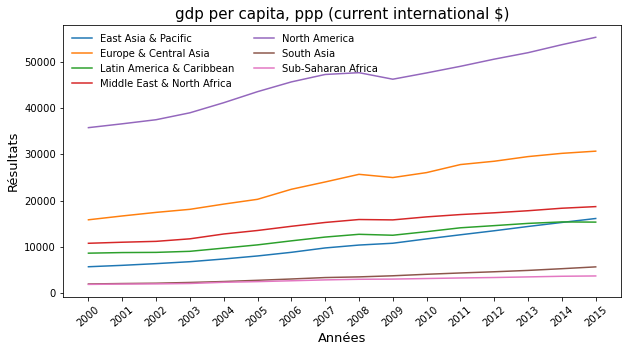

--------------------------------------


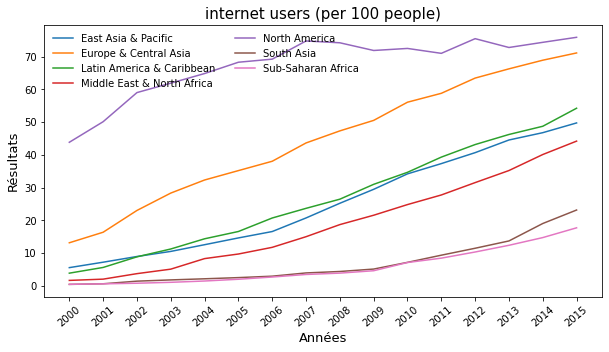

--------------------------------------


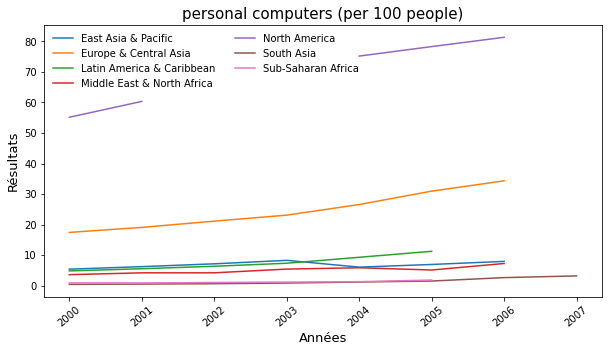

--------------------------------------


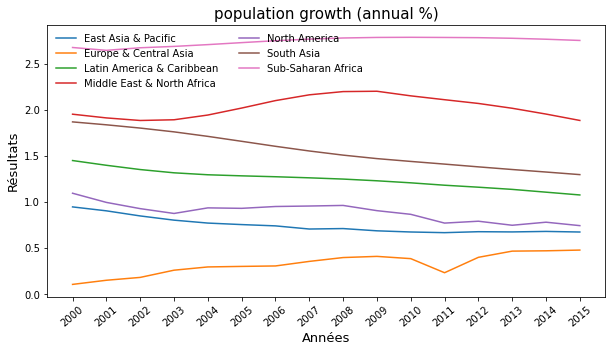

--------------------------------------


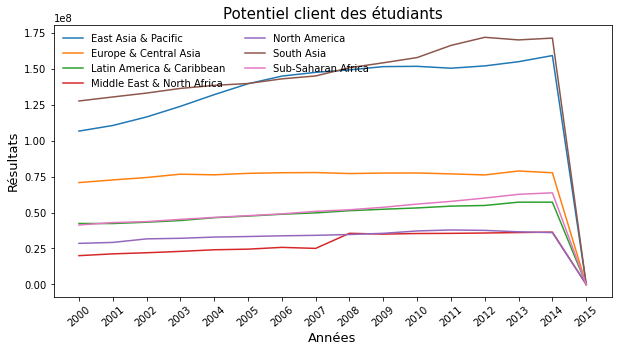

In [64]:
df_temp = df_data_final_region.copy()

for ind in df_data_final_region['Indicator Name'].unique():
    print('--------------------------------------')
    fig = plt.figure(1, figsize=(10, 5))
    df_ind = df_temp[df_temp['Indicator Name'] == ind]
    plt.title(ind,fontsize=15)
    for reg in df_temp['Country Name'].unique():
        df_graph = df_ind.loc[df_ind['Country Name'] == reg, "2000":"2015"]
        data = {'Année': df_graph.columns, 'Valeur': df_graph.values[0]}
        df2 = pd.DataFrame(data)
        plt.plot(df2['Année'], df2['Valeur'])
        del df_graph
        del data
        del df2
    plt.legend(df_temp['Country Name'].unique(), loc = 'upper left', ncol=2, frameon=False)
    plt.xticks(rotation=40)
    plt.xlabel("Années",fontsize=13)
    plt.ylabel("Résultats",fontsize=13)
    plt.show();
    del fig
    del df_ind
    
del df_temp

Au vue de ces graphiques, on peut voir que les tendances s'inversent. Asie de l'est & du pacific ainsi que l'Asie du sud qui ont le plus de potentiel client estimé, alors que l'Afrique sub-saharienne ainsi que le Moyen-Orient & L'Afrique du nord, ont la plus grande croissance démographique. Mais si on regarde sur les 3 premiers indicateurs, se sont l'Amérique du nord ainsi que l'Europe & l'Asie centrale qui ont la meilleure santé économique et qualité numérique. On peut donc penser que les pays de ces 2 dernières régions feront partie du haut du classement. 

Il manque à cette analyse 2 autres indicateurs choisit dont nous n'avons pas les données par régions, mais ce n'est pas très grave puisque l'ont a ces données par pays. 

Mais regardons plus précisemment.

## Analyse univariée

Moyenne, Variance, Représentation de la distribution, Représentation de l'évolution temporelle, ... autant de choses que je vais analyser ici.

Je vais donc apporter les informations de mesure de tendance centrale et de dispersion aux dataframes.

In [65]:
# pour les pays
df_data_final_pays['moyenne'] = df_data_final_pays.loc[:,"2000":"2015"].mean(axis=1)

# pour les régions
df_data_final_region['moyenne'] = df_data_final_region.loc[:,"2000":"2015"].mean(axis=1)

Je vais commencer cette analyse par répondre à cette question : *Quels sont les pays avec un fort potentiel de clients pour nos services ?* 

### Fort potentiel client

Ayant plusieurs résultats, je fais le choix de me baser sur la moyenne de tous les résultats, car prendre la dernière valeur de chaque région engendrerait des comparaisons sur les années différentes. 

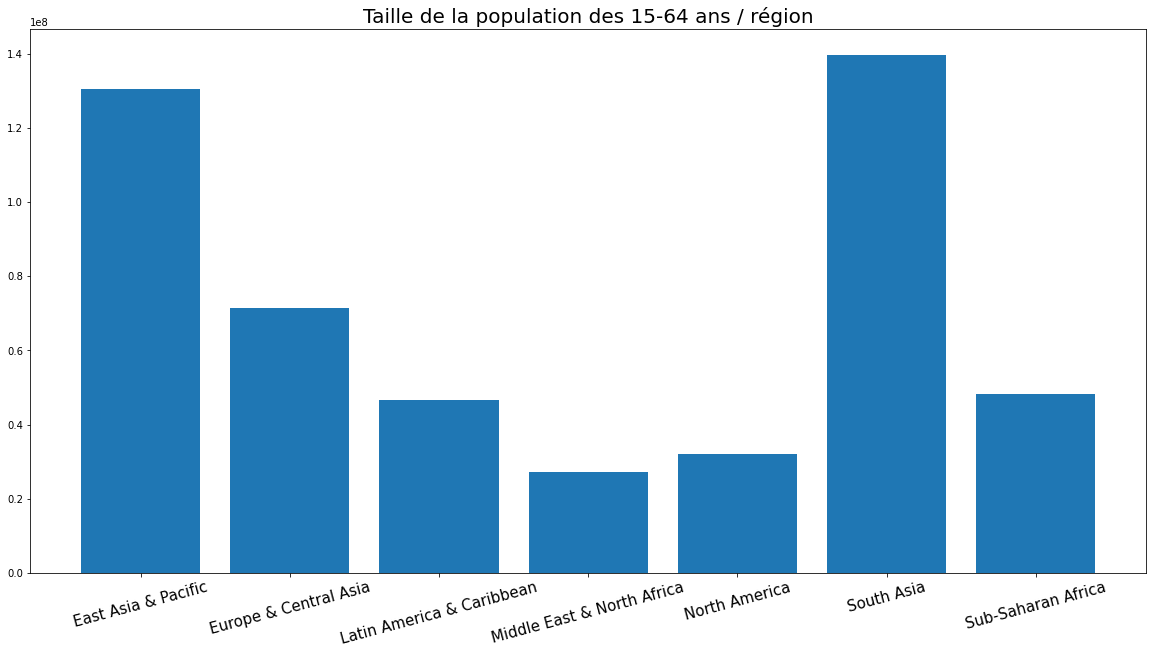

In [66]:
# Création du sous-échantillon
df_temp = df_data_final_region[df_data_final_region['Indicator Name'].isin(indPotentielClient)]

# Configuration du graphique
plt.figure(1, figsize=(20, 10))
plt.bar(df_temp['Country Name'], df_temp['moyenne'])
plt.title('Taille de la population des 15-64 ans / région', fontsize=20)
plt.xticks(df_temp['Country Name'].unique(), fontsize=15)
plt.xticks(rotation=15)
plt.show();

del df_temp

Comme on l'avait déjà vu, le potentiel client le plus élevé se trouve en Asie du Sud, puis suivie de très près par l'Asie de l'est et du Pacific avec respectivement, près de 140 millions et 130 millions de jeunes. 

Mais je vais quand même regarder au niveau des pays.

In [67]:
print("------------------------------------------------------------------")
print("Classement des 10 pays avec le plus gros potentiel client estimé :")
print("------------------------------------------------------------------")
df_temp = df_data_final_pays[df_data_final_pays['Indicator Name'].isin(indPotentielClient)]
print(df_temp.groupby(['Country Name', 'Region']).sum()[['moyenne']].sum(axis=1).sort_values(ascending = False).iloc[:10])

# Je récupère uniquement la liste des 10 pays avec le plus de potentiel client
top10PotentielClient = df_temp.groupby(['Country Name']).sum()[['moyenne']].sum(axis=1).sort_values(ascending = False).iloc[:10]
top10PotentielClient = top10PotentielClient.index
del df_temp

------------------------------------------------------------------
Classement des 10 pays avec le plus gros potentiel client estimé :
------------------------------------------------------------------
Country Name    Region                    
United States   North America                 3.051768e+07
United Kingdom  Europe & Central Asia         5.407952e+06
Korea, Rep.     East Asia & Pacific           5.055226e+06
France          Europe & Central Asia         4.607678e+06
Germany         Europe & Central Asia         3.317225e+06
Australia       East Asia & Pacific           2.335062e+06
Saudi Arabia    Middle East & North Africa    1.319761e+06
Netherlands     Europe & Central Asia         1.186908e+06
Canada          North America                 1.160112e+06
Sweden          Europe & Central Asia         8.626906e+05
dtype: float64


Cette vision par pays contredit ce que l'on a vu sur le graphique : il y aurait plus de potentiel client en Europe et Asie central, qu'en Asie du sud, de l'est et du pacifique. Et on peut d'ailleurs voir que les Etats-Unis sont très loin devant tous les autre pays (30,5 millions contre 5 millions pour le 2ème pays avec le plus gros potentiel, l'Angleterre).

Voyons maintenant l'évolution des distributions pour ces pays.

### Evolution du potentiel client

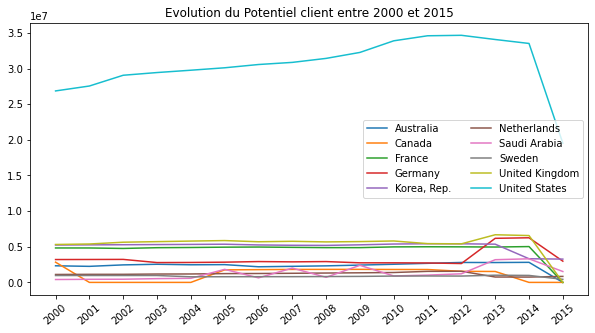

In [68]:
# Création du sous-échantillon
df_temp = df_data_final_pays[df_data_final_pays['Country Name'].isin(top10PotentielClient)]
df_temp = df_temp[df_temp['Indicator Name'].isin(indPotentielClient)]

# Configuration du graphique sur l'évolution des potentiels client entre 2000 et 2015 sur ces 10 pays
fig = plt.figure(1, figsize=(10, 5))
plt.title("Evolution du Potentiel client entre 2000 et 2015")
for pays in df_temp['Country Name'].unique():
    df_graph = df_temp.loc[df_temp['Country Name'] == pays, "2000":"2015"]
    data = {'Année': df_graph.columns, 'Valeur': df_graph.values[0]}
    df2 = pd.DataFrame(data)
    plt.plot(df2['Année'], df2['Valeur'])
plt.legend(df_temp['Country Name'].unique(), loc = 'center right', ncol=2)
plt.xticks(rotation=40)
plt.show();
del df_temp

A part pour les Etats-Unis, les pays ont un potentiel client qui stagne. Si on choisit un ou plusieurs pays (hors Etats-Unis) qui se trouve dans cette liste, on aura donc un potentiel client estimé entre 1 et 6 millions d'étudiant. 

Je vais regarder si la croissance démographique confirme ces affirmations.

In [69]:
# Création du sous-échantillon
df_temp = df_data_final_pays[df_data_final_pays['Country Name'].isin(top10PotentielClient)]
df_temp = df_temp[df_temp['Indicator Name'] == indSantePays[0]]
df_temp[['Country Name','moyenne']]

,Country Name,moyenne
17,Australia,1.429380
44,Canada,1.010027
89,France,0.602980
98,Germany,-0.031568
150,"Korea, Rep.",0.563502
187,Netherlands,0.430615
216,Saudi Arabia,2.759092
251,Sweden,0.631203
276,United Kingdom,0.651418
286,United States,0.873524


En effet, la croissance démographique de ces pays se trouve entre 0 et 2% de croissance annuel seulement.

Je vais maintenant passer à une analyse bivariée en étudiant la corrélation entre les indicateurs. 

## Analyse bivariée
### Corrélation entre le pourcentage d'Accès à internet et le pourcentage de Possession d'un ordinateur

J'aimerais ici savoir s'il y a un lien entre l'accès à internet et la possession d'un ordinateur. En effet, la plupart du temps, l'un ne va pas sans l'autre. 

In [70]:
df_temp = df_data_final_pays.loc[df_data_final_pays['Indicator Name'].isin(indQualiteNumerique),['Country Name','Indicator Name','moyenne']]
df_res = pd.DataFrame([], columns = ['Country Name', 'ordi', 'internet'])
for pays in df_temp['Country Name'].unique():
    resultat1 = df_temp.loc[(df_temp['Country Name'] == pays) & (df_temp["Indicator Name"]==indQualiteNumerique[0]),'moyenne'].values.tolist()
    resultat2 = df_temp.loc[(df_temp['Country Name'] == pays) & (df_temp["Indicator Name"]==indQualiteNumerique[1]),'moyenne'].values.tolist()
    if (len(resultat1) > 0) & (len(resultat2) > 0):
        d = {'Country Name' : pays, 'ordi' : resultat1, 'internet' : resultat2}
        df_res = df_res.append(pd.DataFrame(d))
print("Coefficient de Pearson :", pearsonr(df_res["internet"],df_res["ordi"])[0])
print("P-value :", pearsonr(df_res["internet"],df_res["ordi"])[1])
del df_temp
del df_res
del resultat1
del resultat2
del d

Coefficient de Pearson : 0.6417543862701243
P-value : 0.000963867313077035


La p-value est inférieure à 5%, donc les variables ne sont pas indépendantes. Le coefficient de Pearson est plus proche de 1 donc les variables sont corrélées : quand il y a beaucoup de personne avec une connection internet, il y a beaucoup de personne avec un ordinateur portable. Mon hypothèse était donc juste.

J'aimerais maintenant tester une seconde hypothèse.

### Corrélation entre la Croissance démographique et le PIB / la Qualité de l'éducation

J'ai fait des recherches sur internet et j'y ai vu qu'une croissance démographique forte entrainait pauvreté et mauvaise qualité de l'éducation.

In [71]:
df_temp = df_data_final_pays.loc[df_data_final_pays['Indicator Name'].isin(indSantePays),['Country Name','Indicator Name','moyenne']]
df_res = pd.DataFrame([], columns = ['Country Name', 'croissance', 'pib'])
for pays in df_temp['Country Name'].unique():
    resultat1 = df_temp.loc[(df_temp['Country Name'] == pays) & (df_temp["Indicator Name"]==indSantePays[0]),'moyenne'].values.tolist()
    resultat2 = df_temp.loc[(df_temp['Country Name'] == pays) & (df_temp["Indicator Name"]==indSantePays[1]),'moyenne'].values.tolist()
    if (len(resultat1) > 0) & (len(resultat2) > 0):
        d = {'Country Name' : pays, 'croissance' : resultat1, 'pib' : resultat2}
        df_res = df_res.append(pd.DataFrame(d))
print("Coefficient de Pearson :", pearsonr(df_res["pib"],df_res["croissance"])[0])
print("P-value :", pearsonr(df_res["pib"],df_res["croissance"])[1])
del df_temp
del df_res
del resultat1
del resultat2
del d

Coefficient de Pearson : 0.11526478703589671
P-value : 0.5591742646914972


Pour l'instant, l'analyse de cette corrélation ne démontre pas l'hypothèse trouver sur internet : le taux de croissance est indépendant du PIB. Je vais quand même regarder du côté de l'éducation.

In [72]:
indCorr = [indSantePays[0], indQualiteEducation[0]]
df_temp = df_data_final_pays.loc[df_data_final_pays['Indicator Name'].isin(indCorr),['Country Name','Indicator Name','moyenne']]
df_res = pd.DataFrame([], columns = ['Country Name', 'croissance', 'dépenses'])
for pays in df_temp['Country Name'].unique():
    resultat1 = df_temp.loc[(df_temp['Country Name'] == pays) & (df_temp["Indicator Name"]==indCorr[0]),'moyenne'].values.tolist()
    resultat2 = df_temp.loc[(df_temp['Country Name'] == pays) & (df_temp["Indicator Name"]==indCorr[1]),'moyenne'].values.tolist()
    if (len(resultat1) > 0) & (len(resultat2) > 0):
        d = {'Country Name' : pays, 'croissance' : resultat1, 'dépenses' : resultat2}
        df_res = df_res.append(pd.DataFrame(d))
print("Coefficient de Pearson :", pearsonr(df_res["dépenses"],df_res["croissance"])[0])
print("P-value :", pearsonr(df_res["dépenses"],df_res["croissance"])[1])
del df_temp
del df_res
del resultat1
del resultat2
del d

Coefficient de Pearson : -0.429741132955037
P-value : 0.017783241749073534


Contrairement à l'analyse précédente, la croissance démographique est corrélée négativement avec la qualité de l'éducation : plus la croissance démographique est élevée, plus la qualité de l'éducation est faible (et inversement).
Par conséquent, je vais considérer dans mes scores que la croissance démographique qu'un fort taux engendrera un faible score.

Je vais justement passer à l'étape du scoring.

## Scoring : création d'un classement des pays où s'exporter

J'ai choisi 5 indicateurs pour établir mon score final, mais il n'y aura que 4 scores qui vont définir ce score final :
- le score sur la santé économique du pays
- le score sur la qualité numérique
- le score sur la qualité de l'éducation

En effet, les indicateurs concernant internet et les ordinateurs personnels sont dépendant l'un de l'autre, je vais donc les transformer en score et créer le score de la qualité numérique grâce à eux. 

Pour établir ces scores, j'ai choisi de me baser sur :
- les données de moyenne (moyenne des résultats de l'indicateur sur toutes les années)
- la méthode des quantile, car elle palit au limite de la méthode max (qui rend obsolète le score en présence de valeur extrême).

### Modification des indicateurs

Dans cette optique, je vais d'abord transposer les indicateurs en colonne en leur attribuant pour valeur le résultat de la colonne moyenne associée. 

In [73]:
df_score_pays = df_data_final_pays[["Country Name", "Country Code","Region"]].drop_duplicates()
for i in indScore :
    df_score_pays[i] = np.nan
for pays in df_score_pays['Country Name'].unique():
    for i in indScore :
        df_temp = df_data_final_pays.loc[(df_data_final_pays['Country Name'] == pays) & (df_data_final_pays["Indicator Name"]==i),:]
        resultat = df_temp.loc[:,'moyenne']
        if len(resultat) > 0:
            df_score_pays.loc[df_score_pays['Country Name'] == pays,i] = float(pd.to_numeric(resultat))
        else:
            df_score_pays.loc[df_score_pays['Country Name'] == pays,i] = np.nan
        del resultat
df_score_pays.head()

,Country Name,Country Code,Region,"gdp per capita, ppp (current international $)",government expenditure on education as % of gdp (%),internet users (per 100 people),personal computers (per 100 people),population growth (annual %)
1,American Samoa,ASM,East Asia & Pacific,NaN,NaN,NaN,NaN,-0.137241
5,Andorra,AND,Europe & Central Asia,NaN,2.511239,60.227381,NaN,1.201504
12,Australia,AUS,East Asia & Pacific,36696.082411,4.997476,71.562854,53.622604,1.429380
22,Austria,AUT,Europe & Central Asia,39408.009250,5.474083,63.952521,50.036888,0.482063
31,Bahrain,BHR,Middle East & North Africa,39818.739729,2.600554,47.727865,36.498867,4.799150


De plus, pour automatiser les tâches répétitives, je vais créer une fonction qui permettra de créer le score du (ou des) indicateur(s) donné(s) en paramètre. 

### Création des scores

In [74]:
def create_scoring(df, listeInd): # pour chaque indicateur renseigné dans la liste du paramètre, va créé son score dans le dataframe donné en paramètre
    for cle, ind in listeInd.items():
        indicateur = 'score_' + cle
        df[indicateur] = pd.qcut(df.loc[:,ind], 6, labels = False).round(2)
        # N'ayant pas de valeur pour certains pays, on considère leur score manquant comme = 0
        df.loc[df[indicateur].isna(), [indicateur]] = 0
    return df

In [75]:
# Création du dictionnaire pour l'appel de la fonction
dic = {"pib" : indScore[0], "dep_educ" : indScore[1], "internet" : indScore[2], "ordi" : indScore[3], "croissance_demo" : indScore[4]}

# Appel de la fonction
df_score_pays = create_scoring(df_score_pays, dic)

# Suppression des variables inutiles
del dic

In [76]:
# Création du score final
df_score_pays['score_final'] = (df_score_pays['score_pib'] 
                                + 
                                df_score_pays['score_dep_educ'] 
                                + 
                                df_score_pays['score_internet']
                                + 
                                df_score_pays['score_ordi'] 
                                + 
                                (1-df_score_pays['score_croissance_demo']) # Le score doit être bas
                                ) / 5

# Arrondi du score à 2 décimales
df_score_pays['score_final'] = df_score_pays['score_final'].round(2)

# Affichage du résultat
df_score_pays.head()

,Country Name,Country Code,Region,"gdp per capita, ppp (current international $)",government expenditure on education as % of gdp (%),internet users (per 100 people),personal computers (per 100 people),population growth (annual %),score_pib,score_dep_educ,score_internet,score_ordi,score_croissance_demo,score_final
1,American Samoa,ASM,East Asia & Pacific,NaN,NaN,NaN,NaN,-0.137241,0.0,0.0,0.0,0.0,0,0.2
5,Andorra,AND,Europe & Central Asia,NaN,2.511239,60.227381,NaN,1.201504,0.0,0.0,1.0,0.0,4,-0.4
12,Australia,AUS,East Asia & Pacific,36696.082411,4.997476,71.562854,53.622604,1.429380,2.0,3.0,3.0,3.0,4,1.6
22,Austria,AUT,Europe & Central Asia,39408.009250,5.474083,63.952521,50.036888,0.482063,3.0,4.0,2.0,2.0,1,2.2
31,Bahrain,BHR,Middle East & North Africa,39818.739729,2.600554,47.727865,36.498867,4.799150,3.0,0.0,0.0,0.0,5,-0.2


# Conclusions

In [77]:
df_score_pays.sort_values('score_final', ascending = False)[['Country Code','Country Name','Region', 'score_final']].iloc[:10]

,Country Code,Country Name,Region,score_final
246,SWE,Sweden,Europe & Central Asia,3.4
62,DNK,Denmark,Europe & Central Asia,3.4
203,NOR,Norway,Europe & Central Asia,3.2
256,CHE,Switzerland,Europe & Central Asia,3.0
182,NLD,Netherlands,Europe & Central Asia,3.0
281,USA,United States,North America,2.6
40,CAN,Canada,North America,2.4
22,AUT,Austria,Europe & Central Asia,2.2
74,FIN,Finland,Europe & Central Asia,2.2
163,LUX,Luxembourg,Europe & Central Asia,2.0


Comme vu lors de nos première analyse, se sont des pays faisant partis de l'Europe & Asie central et de l'Amérique du nord qui font partis du haut du classement, puis viennent ensuite des pays de l'Asie de l'est & du pacific et de l'Amérique du nord. Si on reprends le top 10 des pays à fort potentiel client estimé...

In [78]:
top10PotentielClient

Index(['United States', 'United Kingdom', 'Korea, Rep.', 'France', 'Germany',
       'Australia', 'Saudi Arabia', 'Netherlands', 'Canada', 'Sweden'],
      dtype='object', name='Country Name')

On voit que l'on retrouve :
- la Suède
- les Pays-Bas
- les Etats-Unis
- le Canada

Il faudrait mieux privilégier ces pays là du classement.

Pour une future analyse, il serait intéressant de trouver d'autres sources de données tel que des données sur les personnes (avec ou sans activité) en évolution ou reconversion professionnel. On pourrait aussi analyser les indicateurs des pays par rapport à notre pays d'implantation qu'est la France.

# Evaluation 
## Compétences évaluées et Commentaires

- Utiliser un notebook Jupyter pour faciliter la rédaction du code et la collaboration (*Validé*) 

Commentaires : /

- Effectuer une représentation graphique à l'aide d'une librairie Python adaptée (*Validé*) 

Commentaires : Les représentations graphique sont claires et lisibles

- Manipuler des données avec des librairies Python spécialisées (*Validé*) 

Commentaires : Les librairies Python spécialisées sont utilisées et maîtrisées

- Mettre en place un environnement Python (*Validé*) 

Commentaires : /

- Maîtriser les opérations fondamentales du langage Python pour la Data Science (*Validé*)

Commentaires : Les opérations fondamentales de Python sont maîtrisées

## Soutenance et Livrable
### Livrable

Points forts : Très bonne analyse exploratoire des indicateurs

Axes d'amélioration : Illustrer plus ces propos, notamment le nettoyage via des visualisations pertinentes

### Soutenance

Remarques : /